#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

#### Function below will generate uniformly distributed points along with uniformly distributed labels.
#### The labels are 0 or 1 and points are between 0 and 1

In [2]:
def ph(n):
  x1= np.random.uniform(0,1,n) #Generate uniformly distributed x1
  x2= np.random.uniform(0,1,n) #Generate uniformly distributed x2
  y=  np.random.uniform(0,2,n).astype(int) #Generate uniformly distributed y (either 0 or 1)
  return np.stack((x1,x2,y),axis=1) # returns numpy array of stacked x1,x2 and y



#### Function below generates training data as specified in the Question.
#### Given an hS,v the underlying probability distribution ph(x,y) is determined by sampling an x uniformly at random from [0, 1] and then its corresponding y value is then generated by flipping biased coin P(heads) = 0.8/P(tails) = 0.2 if heads comes up then y = hS,3(x) otherwise y is sampled uniformly at random from {0, 1}.

In [3]:
def phxy(m,h): 
    train = ph(m) # generate training data with function ph(n) defined above
    
    for j in range(len(train)): #iterate through all rows of training data
        if(np.random.binomial(1, 0.8, 1)==1): #toss a biased coin with P(heads)=0.8
            point1 = train[j][0:2].reshape(1,2) #reshape every x1,x2 to a 2D array for inputng in next line of code
            top3=sort_index(numpy_vectorized(point1,h[:,0:2]).flatten().tolist())[:3] #generate index of top 3 neighbours of ever training data
            neighbour_sum = sum(h[top3,2]) #voting begins
            if(neighbour_sum>1): #if votes are greater then 1 then it is counted as label 1 else 0
                train[j][2]=1 #make necessary changes to the label of training data for y label
            else:
                train[j][2]=0 # else training data is 0
    
    return train #return training data



#### Below function generates indices of nearest neighbours from training data

In [4]:
def sort_index(lst, rev=False): #arguments is a list which will be act as an input
    index = range(len(lst)) #index will be used below for the loop using lambda function
    s = sorted(index, reverse=rev, key=lambda i: lst[i]) # this will generate list of indices that contain nearest neighbours in descending order
    return s # returns list

#### Below function will generate norm or euclidean distances of every point of test data withe every point of training data.

In [5]:
def numpy_vectorized(X,Y): # arguments are 2 arrays
    return np.sum((X[:,None,:] - Y[None,:,:])**2, axis=2)**0.5  #returns euclidean distance every point of test data withe every point of training data.

#### This is where the Protocol A is computed

In [6]:
error_list=[] # initialise an empty dynamics list which will contain k , iterations (0-99 or 100 iterations , generalisation error)
for k in range(1,50): # iterate for k from 1-49
    for itr in range(100): # 100  runs
        h=ph(100) # Sample a h from pH 
        train = phxy(4000,h) # Build a k-NN model with 4000 training points sampled from ph(x,y)
        test = phxy(1000,h) # Generate test data from ph(x,y)
        test = np.append(test,np.zeros(1000).reshape(1000,1),axis=1) #add 4th column containings 0's which will be changed later basically for prediction
        for index in range(len(test)): #iterate through every point of test data
            point1 = test[index][0:2].reshape(1,2) #reshape every x1,x2 to a 2D array for inputng in next line of code
            topk=sort_index(numpy_vectorized(point1,train[:,0:2]).flatten().tolist())[:k] #finds indices of nearest neighbours of test data from train data
            neighbour_sum = sum(train[topk,2]) #voting

            if (k%2==0): #case when k is even
                if (neighbour_sum >0.5*k): #if more then 50% votes in favour of 1 then test point classified as 1
                    test[index][3]=1
                elif (neighbour_sum <0.5*k): #if less then 50% votes in favour of 1 then test point classified as 0
                    test[index][3]=0
                else :test[index][3]=np.random.uniform(0,2,1).astype(int)[0] #tie 50-50 then point is classified as 0 or 1 using uniform distribution
            else:
                if (neighbour_sum > 0.5*k): #case when k is odd and more then 50% votes in favour of 1 then test point classified as 1
                    test[index][3]=1
                else :test[index][3]=0 #else 0


        error_list.append((k,itr,sum(test[:,2]!=test[:,3])/1000)) #append data of k , itr , Generalisation error to list as a tuple
        
        print(str(k)+' '+str(itr)+' is done') #print after iteration is complete
    

1 0 is done
1 1 is done
1 2 is done
1 3 is done
1 4 is done
1 5 is done
1 6 is done
1 7 is done
1 8 is done
1 9 is done
1 10 is done
1 11 is done
1 12 is done
1 13 is done
1 14 is done
1 15 is done
1 16 is done
1 17 is done
1 18 is done
1 19 is done
1 20 is done
1 21 is done
1 22 is done
1 23 is done
1 24 is done
1 25 is done
1 26 is done
1 27 is done
1 28 is done
1 29 is done
1 30 is done
1 31 is done
1 32 is done
1 33 is done
1 34 is done
1 35 is done
1 36 is done
1 37 is done
1 38 is done
1 39 is done
1 40 is done
1 41 is done
1 42 is done
1 43 is done
1 44 is done
1 45 is done
1 46 is done
1 47 is done
1 48 is done
1 49 is done
1 50 is done
1 51 is done
1 52 is done
1 53 is done
1 54 is done
1 55 is done
1 56 is done
1 57 is done
1 58 is done
1 59 is done
1 60 is done
1 61 is done
1 62 is done
1 63 is done
1 64 is done
1 65 is done
1 66 is done
1 67 is done
1 68 is done
1 69 is done
1 70 is done
1 71 is done
1 72 is done
1 73 is done
1 74 is done
1 75 is done
1 76 is done
1 77 is d

#### Here we convert to error list to data frame and then calculates the required mean of generalisation error

In [7]:
df_op = pd.DataFrame(error_list, columns =['k', 'i', 'GE']) # create a dataframe from tuple generated above
final = df_op.groupby('k')['GE'].mean().add_suffix('').reset_index() #group by K and calculate mean of generalisation error

#### Plot of Protocol A

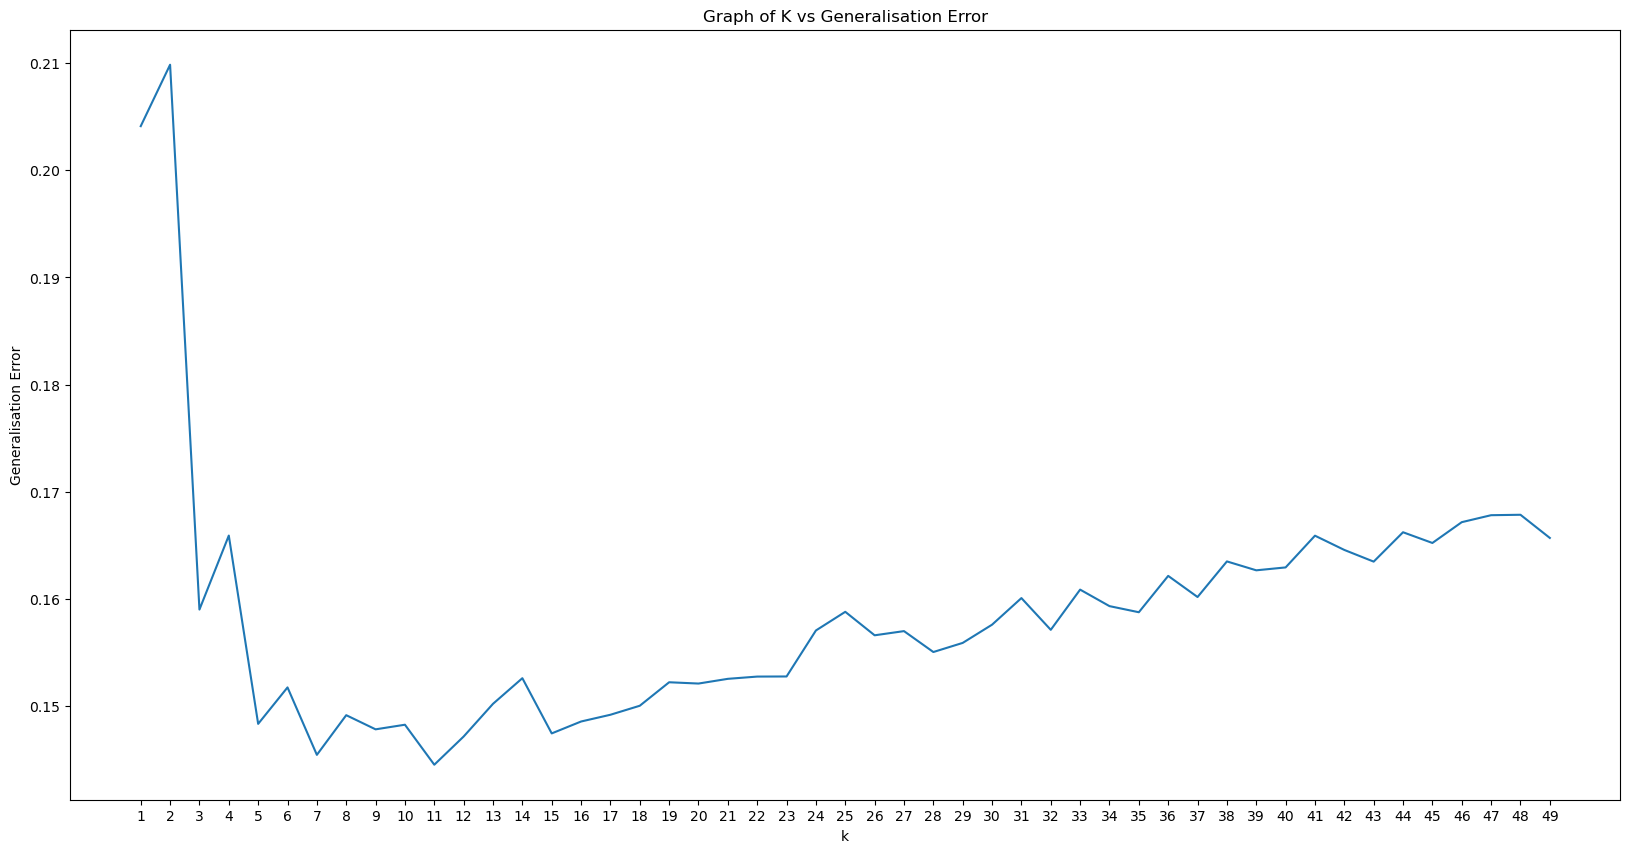

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(final['k'],final['GE'])
plt.xlabel('k')
plt.ylabel('Generalisation Error')
plt.title('Graph of K vs Generalisation Error')
plt.show()
fig.savefig('protocolA')